#### Import libraries

Before dig into the dataset, all necessary libaries are imported below.

In [236]:
import numpy as np
import pandas as pd
import csv
import pickle
from pprint import pprint
import matplotlib.pyplot as plt 
from sklearn.cross_validation import train_test_split,StratifiedShuffleSplit
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import grid_search
%matplotlib inline  

# 1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it.

## 1.1 Understanding the Dataset and Question
The purpose of this project is to identify POI by ML programme which run against the Enron dataset.
The Enron dataset is comprised of Enron email dataset and Enron Financial features dataset.Since this dataset contains two group of people poi and non-poi and features of two group of people, we can reveal relationships between features of different group of people. Then, we can use these realtionships to identify POI.

## 1.2. Data Exploration

There are few questions about the dataset:
  - Total number of data points
  - Allocation across classes (POI/non-POI)
  - Number of features used
  - Are there features with many missing values
  

The data set is loaded below

In [237]:
FilePath = r'C:\Users\ares\Documents\PycharmProjects\ud120\final_project\final_project_dataset.pkl'
with open(FilePath, 'r') as data_file:
    data_dict = pickle.load(data_file)

### Full dataset is used in data exploration
### Transform dict to a pandas DataFrame
### rows for observation, columns for features
data_dict = pd.DataFrame(data_dict)
data_dict = data_dict.T

### replace string 'NaN' with null
data_dict = data_dict.replace(to_replace = 'NaN',value = np.nan)


### 1.2.1 Overview of Data Structure

In [238]:
data_dict.head(1)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541


### 1.2.2 Check data profile by describe() function

In [239]:
data_dict.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82.000000,39.000000,49.000000,17.000000,1.020000e+02,95.000000,86.000000,86.000000,86.000000,4.0000,66.000000,93.000000,146,1.100000e+02,18.000000,95.000000,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2374234.609756,1642674.153846,-1140475.142857,166804.882353,5.987054e+06,108728.915789,608.790698,64.895349,41.232558,41962500.0000,1470361.454545,919064.967742,0.123288,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,10713327.969046,5161929.973575,4025406.378506,319891.409747,3.106201e+07,533534.814109,1841.033949,86.979244,100.073111,47083208.7019,5942759.315498,4589252.907638,0.329899,1.251828e+07,4201494.314703,2716369.154553,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,70000.000000,-102500.000000,-27992891.000000,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,400000.0000,69223.000000,2.000000,False,-2.604490e+06,-7576788.000000,477.000000,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,431250.000000,81573.000000,-694862.000000,98784.000000,5.278862e+05,22614.000000,22.750000,10.000000,1.000000,1600000.0000,281250.000000,1215.000000,0,2.540180e+05,-389621.750000,211816.000000,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,769375.000000,227449.000000,-159792.000000,108579.000000,1.310814e+06,46950.000000,41.000000,35.000000,8.000000,41762500.0000,442035.000000,52382.000000,0,4.517400e+05,-146975.000000,259996.000000,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1200000.000000,1002671.500000,-38346.000000,113784.000000,2.547724e+06,79952.500000,145.500000,72.250000,24.750000,82125000.0000,938672.000000,362096.000000,0,1.002370e+06,-75009.750000,312117.000000,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,97343619.000000,32083396.000000,-833.000000,1398517.000000,3.117640e+08,5235198.000000,14368.000000,528.000000,609.000000,83925000.0000,48521928.000000,42667589.000000,True,1.303223e+08,15456290.000000,26704229.000000,5521.000000,15149.000000,3.098866e+08,4.345095e+08


### 1.2.3 Total number of data points and features

In [240]:
data_dict.shape

(146, 21)

 - 146 data points
 - 20 features
 - 1 target

### 1.2.3 Allocation across classes (POI/non-POI)

In [241]:
data_dict['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

 - 'poi' has 128 observation
 - 'non-poi' has 18 observation

### 1.2.4 Are there features with many missing values

In [242]:
data_dict.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

#### Following features have massive null values

 - deferral_payments 
 - director_fees
 - loan_advances
 - restricted_stock_deferred    

### 1.2.5 Remove email column
20 features will be used in this project after email_address was removed

In [243]:
# data_dict = data_dict[features_list]
data_dict = data_dict.drop('email_address',axis = 1)

In [244]:
#data_dict.head(3)

## 1.3 Outlier Investigation 

### 1.3.1 Check if there are outliers of 'total_payments' and 'total_stock_value'

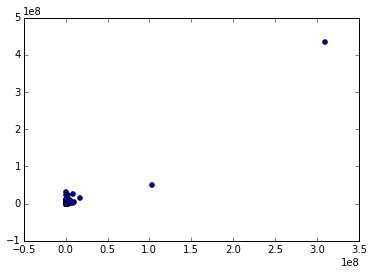

In [245]:
plt.scatter(data_dict['total_payments'],data_dict['total_stock_value'])

Look for index of outlier

In [246]:
data_dict['total_stock_value'].argmax()

'TOTAL'

Remove outlier

In [247]:
data_dict = data_dict.drop(['TOTAL'],axis = 'index')

Recheck the dataset after total has been removed

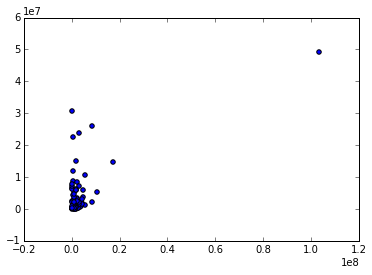

In [248]:
plt.scatter(data_dict['total_payments'],data_dict['total_stock_value'])

Look for index of outlier

In [249]:
data_dict['total_stock_value'].argmax()

'LAY KENNETH L'

Check features of this outlier

In [250]:
data_dict.loc['LAY KENNETH L']

bonus                              7e+06
deferral_payments                 202911
deferred_income                  -300000
director_fees                        NaN
exercised_stock_options      3.43484e+07
expenses                           99832
from_messages                         36
from_poi_to_this_person              123
from_this_person_to_poi               16
loan_advances                 8.1525e+07
long_term_incentive              3.6e+06
other                        1.03597e+07
poi                                 True
restricted_stock             1.47617e+07
restricted_stock_deferred            NaN
salary                       1.07232e+06
shared_receipt_with_poi             2411
to_messages                         4273
total_payments                1.0356e+08
total_stock_value            4.91101e+07
Name: LAY KENNETH L, dtype: object

I decided that I will not delete 'LAY KENNETH L' because it's a POI

### 1.3.2 Find observation which are identified as poi but doesn't have emails from poi
A POI who doesn't have email communication with other POIs should be the result of missing data.

In [251]:
data_dict[(data_dict['poi']== True)&(data_dict['from_poi_to_this_person'].isnull())].head(1)


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
FASTOW ANDREW S,1300000,NaN,-1386055,NaN,NaN,55921,NaN,NaN,NaN,NaN,1736055,277464,True,1794412,NaN,440698,NaN,NaN,2424083,1794412


Remove these observation as outliers/dirty data

In [252]:
data_dict = data_dict.drop(data_dict.loc[ ((data_dict['poi']== True) 
                                           & (data_dict['from_poi_to_this_person'].isnull()))].index
                           , axis = 0)

In [253]:
data_dict = data_dict.applymap(float)

In [254]:
len(data_dict)

141

### 1.3.3 Find and drop the unreal person 'THE TRAVEL AGENCY IN THE PARK’

In [255]:
data_dict[data_dict.index.str.contains('PARK')]

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362096,0,NaN,NaN,NaN,NaN,NaN,362096,NaN


In [256]:
data_dict = data_dict.drop('THE TRAVEL AGENCY IN THE PARK', axis = 0)
len(data_dict)

140

### 1.3.4 Find and drop the observation which only has null value

In [257]:
data_dict.loc[data_dict.drop('poi',axis = 'columns').isnull().sum(axis = 'columns') 
              == len(data_dict.drop('poi',axis = 'columns').columns)]


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
data_dict = data_dict.drop('LOCKHART EUGENE E', axis = 0)
len(data_dict)

139

# 2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? 

By using both univariate feature selection and manual feature selection, I ended up with using folliwng features:
 - 'total_payments'
 - 'total_stock_value'
 - 'shared_receipt_with_poi'
 - 'from_this_person_to_poi_ratio'
 - 'from_poi_to_this_person_ratio'

Following features were used initially as suggested by univariate, but didn't come up with good result:
 - 'bonus'
 - 'exercised_stock_options'
 - 'salary'
 - 'total_stock_value'
 - 'from_this_person_to_poi_ratio'

I scaled faetures by normalizing features. I did that becasue all fearues take same weight in the ML after scaling

## 2.1 Create new features 

Instead of using absolute amount of email, I reckon using a ratio would be more make sense to detect POI. Therefore, I created two new features from_this_person_to_poi_ratio and from_poi_to_this_person_ratio. These two featrues reflect the percentage of email that is ralted to POI.

These new features are tested against Decision Tree algorithm in 6.2 below. The reuslt shows that these new features signicantly improved the pricision and recall. Besides, they take 50% of importance among features used in 6.2, which means they are essential for archiving our goal. 

In [259]:
data_dict["from_this_person_to_poi_ratio"]=data_dict["from_this_person_to_poi"]/data_dict["from_messages"]
data_dict["from_poi_to_this_person_ratio"]=data_dict["from_poi_to_this_person"]/data_dict["to_messages"]

In [260]:
data_dict.head(1)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_this_person_to_poi_ratio,from_poi_to_this_person_ratio
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,1729541,13868,2195,47,65,NaN,...,0,126027,-126027,201955,1407,2902,4484442,1729541,0.029613,0.016196


## 2.2 Properly scale features 

Properly scale features was implemented by normalizing features.
poi was splited before normalizing

In [261]:
### Split poi before normalize features
labels = data_dict['poi']
data_dict = data_dict.drop('poi',axis = 1)
### check poi_mark
labels.head(1)

ALLEN PHILLIP K    0
Name: poi, dtype: float64

In [262]:
# data_dict.head(1)

In [263]:
data_dict = (data_dict - data_dict.mean()) / (data_dict.max() - data_dict.min())
data_dict.head(1)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_this_person_to_poi_ratio,from_poi_to_this_person_ratio
ALLEN PHILLIP K,0.37445,0.307167,-0.718452,NaN,-0.026062,-0.172048,0.110491,-0.033893,0.039027,NaN,...,-0.045595,-0.057233,-0.043374,-0.074227,0.041771,0.054873,0.017384,-0.027625,-0.154443,-0.100153


## 2.3 Intelligently select features 

null values were replaced by 0

In [264]:
data_dict = data_dict.fillna(value = 0)
data_dict.head(1)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,from_this_person_to_poi_ratio,from_poi_to_this_person_ratio
ALLEN PHILLIP K,0.37445,0.307167,-0.718452,0,-0.026062,-0.172048,0.110491,-0.033893,0.039027,0,...,-0.045595,-0.057233,-0.043374,-0.074227,0.041771,0.054873,0.017384,-0.027625,-0.154443,-0.100153


In [265]:
KBest_f_classif = SelectKBest(f_classif, k=5).fit(data_dict, labels)
x_new = KBest_f_classif.get_support()
data_dict.columns[x_new]


Index([u'bonus', u'exercised_stock_options', u'salary', u'total_stock_value',
       u'from_this_person_to_poi_ratio'],
      dtype='object')

In [266]:
feature_scores = KBest_f_classif.scores_
feature_scores = pd.DataFrame(feature_scores)
feature_scores.index = data_dict.columns
feature_scores.sort_values([0],ascending=[False]).head(5)

,0
exercised_stock_options,20.535508
from_this_person_to_poi_ratio,16.515465
total_stock_value,15.894502
bonus,14.668231
salary,12.098335


Populate a new dataset with 5 features which have highest feature scores from KBest_f_classif.Having highest feature scores means these features are likely to be able to help us build the model and predict poi.

In [267]:
data_dict_optimized_features = data_dict[data_dict.columns[x_new]]
data_dict_optimized_features.head(1)

,bonus,exercised_stock_options,salary,total_stock_value,from_this_person_to_poi_ratio
ALLEN PHILLIP K,0.37445,-0.026062,-0.074227,-0.027625,-0.154443


# 3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?

I ended up using decision tree algorithm after trying algorithms below:
 - decision tree: intend to have lower precision and higher recall
 - SVM: intend to have very high precison and extremly low recall
 - Gaussian Naive Bayes: intend to have higher precision and lower recall

As this project targets to get both precision and recall higher than 0.3, so SVM was abandoned firstly. Since I prefer to pick up less worng poi rather than identifying a innocent, so I chose decision tree which has high recall.

Split traning and test dataset to prepare for validation

In [268]:
x_train, x_test, y_train, y_test = train_test_split(data_dict_optimized_features, labels
                                                    , test_size=0.3, random_state=42)

#### Define function for cross validation

In [269]:
### Modified from test_classifier function in tester.py
def test_classifier(clf, features, labels, folds = 1000):
    ''' clf: class of ML
        features: contains feature data of observation
        labels: contains label of observation
        features and labels must be matched on index of pandas dataframe
        '''
#     data = featureFormat(dataset, feature_list, sort_keys = True)
#     # pprint(dataset)
#     labels, features = targetFeatureSplit(data)
#     print len(labels)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
#     print len(cv)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
#     print cv
#     print features.index
#     print '~~~~~~~~~~~~`'
#     print labels.index
    for train_idx, test_idx in cv:
        
#         print train_idx
#         print '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'
#         print test_idx
        features_train = pd.DataFrame()
        features_test  = pd.DataFrame()
        labels_train   = pd.DataFrame()
        labels_test    = pd.DataFrame()
        features_train = features.iloc[train_idx].sort_index(axis = 'index')
        labels_train   = labels.iloc[train_idx].sort_index(axis = 'index')
        features_test  = features.iloc[test_idx].sort_index(axis = 'index')
        labels_test    = labels.iloc[test_idx].sort_index(axis = 'index')
        
        ### fit the classifier using training set, and test on test set
        
#         print features_train.index == labels_train.index
#         print features_test.index == labels_test.index
#         break
        
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    
#     total_predictions = true_negatives + false_negatives + false_positives + true_positives
#     accuracy = 1.0*(true_positives + true_negatives)/total_predictions
#     print accuracy
#     print true_positives
#     print false_positives
#     print false_negatives
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print 'Precision is {}. Recall is {}'.format(precision,recall)
        print 'f1 is {}. f2 is {}'.format(f1,f2)
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."
        print  'true_positives is {}. true_negatives is {}. false_positives is {}. false_negatives is {}'.format(true_positives
                                                                                                                 ,true_negatives
                                                                                                                 ,false_positives
                                                                                                                 ,false_negatives)


## 3.1 Decision Tree

In [270]:
clf_tree = tree.DecisionTreeClassifier()
test_classifier(clf_tree,data_dict_optimized_features,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Precision is 0.222875816993. Recall is 0.341
f1 is 0.269565217391. f2 is 0.308318264014


## 3.2 Naive Bayes

In [271]:
clf_nai = GaussianNB()
# clf_nai.fit(x_train, y_train)
# pred_nai = clf_nai.predict(x_test)
# print metrics.precision_score(y_test, pred_nai)
# print metrics.recall_score(y_test, pred_nai)
test_classifier(clf_nai,data_dict_optimized_features,labels)

GaussianNB()
Precision is 0.319018404908. Recall is 0.26
f1 is 0.28650137741. f2 is 0.269989615784


## 3.3 Support Vector Machine

In [272]:
clf_svc = SVC(kernel = "rbf", C = 10)
test_classifier(clf_svc,data_dict_optimized_features,labels)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision is 0.744444444444. Recall is 0.067
f1 is 0.122935779817. f2 is 0.0819070904645


# 4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? 

 - Tunning the parameters of an algorithm means to find a suitable way to use the algorithm for a certain question. The same algorithm can perform significantly different with different paramters. The optimized paramters can help us to reduce the chance of overfitting，which refect noise and error rather than the true relationships, while training the model. 

 - However, manually trying out different combination of parameters can take heaps of times. So, by using grid_search, we can facilitate the process.

## 4.1 Tunning SVM

Look for best parameters

In [273]:
parameters_svc = {'kernel':('linear', 'rbf','poly'), 'C':[1, 20],'degree':[1, 20]}
svr = SVC()
clf_GSC = grid_search.GridSearchCV(svr, parameters_svc)
clf_GSC.fit(x_train,y_train)
print clf_GSC.best_params_

{'kernel': 'linear', 'C': 1, 'degree': 1}


Repredict by best paramters

In [274]:
clf_svc = SVC(kernel = "linear", C = 1, degree = 1)
test_classifier(clf_svc,data_dict_optimized_features,labels)

Got a divide by zero when trying out: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.
true_positives is 0. true_negatives is 13000. false_positives is 0. false_negatives is 1000


## 4.2 Tunning decision tree

Look for best parameters

In [275]:
parameters_decision_tree = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'),'min_samples_split':[2,10]}
clf_tree_GSC = tree.DecisionTreeClassifier(criterion = 'gini')
clf_tree_GSC = grid_search.GridSearchCV(clf_tree_GSC, parameters_decision_tree)
clf_tree_GSC = clf_tree_GSC.fit(x_train, y_train)
clf_tree_GSC.best_params_

{'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}

In [276]:
clf_tree = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split=10,splitter= 'random')
test_classifier(clf_tree,data_dict_optimized_features,labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
Precision is 0.21744966443. Recall is 0.162
f1 is 0.185673352436. f2 is 0.170706006322


# 5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  

Validation is the process to test the performance of the model by running the model against a dateset that we didn't use for training the model.

If we only train and test the model on training dataset, we are likely to get an optimistic assessment on how well the model can perform. But the model could actually be overfitting to the specific tranning dateset and not be able to predict/cluster against a new dataset.


Some classic mistake we can make include:
 - Using the accuracy/error of the trainning dataset. We should normally use training dataset to fit the model, but use a separate testing dataset to test model's performance.
 - Testing the result for only once. The test result could be random because of the training/testing dataset are randomly selected, so it's better to run a cross-validation to eliminate the effect of random selection

I implemented a cross validation in function test_classifier to test the model's performance.


# 6. Give at least 2 evaluation metrics and your average performance for each of them. 

Due to the initial features did perform well. I manually selected few features for further investigation.

Naive bayes and Decision tree are used in this section.
The model's performance are evaluated by precision and recall
Precision means if the precision is 0.1 and the model predict there are 100 poi, then 10 of them are actual poi, and 90 of them are not poi. 
Recall means if the recall is 0.2, then 20% of the real poi can be identified by the model.

## 6.1 Pick up new features for testing

In [277]:
features_list = ['total_payments', 'total_stock_value','shared_receipt_with_poi'
                 ,'from_this_person_to_poi_ratio','from_poi_to_this_person_ratio']
data_dict_manual_features = data_dict[features_list]
data_dict_manual_features.head(1)

,total_payments,total_stock_value,shared_receipt_with_poi,from_this_person_to_poi_ratio,from_poi_to_this_person_ratio
ALLEN PHILLIP K,0.017384,-0.027625,0.041771,-0.154443,-0.100153


## 6.2 Testing Decision Tree
As the result of decision Tree.
 - The percision is 0.35. 35% of people who are identified as poi, are actual poi.
 - The recall is 0.398. 39.8% of people who are actual poi, are identified by the moodel

In [278]:
clf_tree = tree.DecisionTreeClassifier()
test_classifier(clf_tree,data_dict_manual_features,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Precision is 0.350660792952. Recall is 0.398
f1 is 0.372833723653. f2 is 0.387536514119


Check importance of features.

In [279]:
clf_tree.feature_importances_ 

array([ 0.        ,  0.        ,  0.4989962 ,  0.40590659,  0.09509721])

In [280]:
data_dict_manual_features.columns

Index([u'total_payments', u'total_stock_value', u'shared_receipt_with_poi',
       u'from_this_person_to_poi_ratio', u'from_poi_to_this_person_ratio'],
      dtype='object')

Testing result without new feautres

In [281]:
clf_tree = tree.DecisionTreeClassifier()
test_classifier(clf_tree,data_dict_manual_features[[u'total_payments', u'total_stock_value', u'shared_receipt_with_poi']],labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Precision is 0.10744500846. Recall is 0.127
f1 is 0.116406966086. f2 is 0.122539560015


As above result, features from_poi_to_this_person_ratio and from_this_person_to_poi_ratio are important in the model.

## 6.3 Tunning pamameters for decision tree

In [282]:
x_train, x_test, y_train, y_test = train_test_split(data_dict_manual_features, labels
                                                    , test_size=0.1, random_state=42)

In [283]:
parameters_decision_tree = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'),'min_samples_split':[2,10]}
clf_tree_GSC = tree.DecisionTreeClassifier(criterion = 'gini')
clf_tree_GSC = grid_search.GridSearchCV(clf_tree_GSC, parameters_decision_tree)
clf_tree_GSC = clf_tree_GSC.fit(x_train, y_train)
clf_tree_GSC.best_params_

{'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}

Intergrating new parameters into decision tree

In [284]:
clf_tree = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split=10,splitter= 'best')
test_classifier(clf_tree,data_dict_manual_features,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Precision is 0.354124748491. Recall is 0.352
f1 is 0.353059177533. f2 is 0.352422907489


## 6.4 Testing Naive Bayes

Naive bayes didn't perform well with the manually selected features. Decision Tree is remained as the final algorithm

In [285]:
clf_nai = GaussianNB()
test_classifier(clf_nai,data_dict_manual_features,labels)

GaussianNB()
Precision is 0.176258992806. Recall is 0.147
f1 is 0.160305343511. f2 is 0.15204799338
